In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng(seed=42)
m = 200
X = 2 * rng.random((m,1))
Y = 4 + 3 * X + rng.standard_normal((m,1))

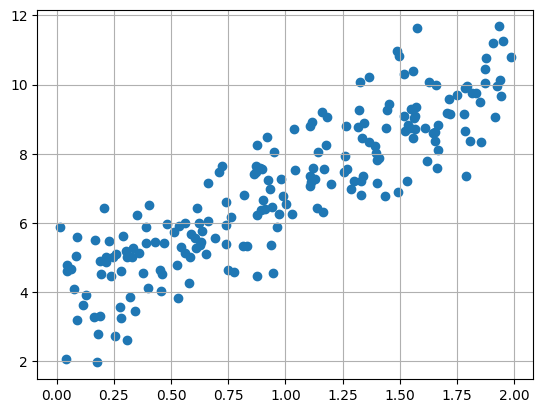

In [8]:
plt.scatter(X,Y)
plt.grid()
plt.show()

In [31]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.pinv(X_b.T @ X_b)@ X_b.T @ Y
theta_best

array([[3.69084138],
       [3.32960458]])

In [17]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 3.69084138],
       [10.35005055]])

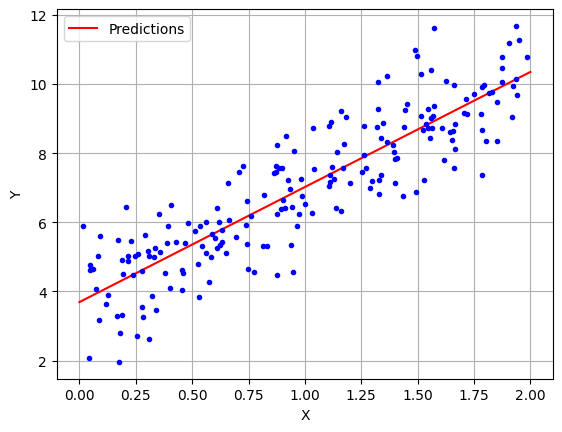

In [18]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,Y)
print(f"""Intercept: {lin_reg.intercept_[0]},
Weights: {lin_reg.coef_[0]}
      """)

Intercept: 3.6908413834642553,
Weights: [3.32960458]
      


In [61]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, Y,rcond=1e-6)
theta_best_svd

array([[3.69084138],
       [3.32960458]])

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal([2,1])

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - Y)
    theta = theta - eta * gradients
    
theta

array([[3.69084138],
       [3.32960458]])

In [50]:
n_epochs = 50
t0, t1 = 5, 50
m = len(X_b)

def learning_schedule(t):
    return t0/(t+t1)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal([2,1])

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = rng.integers(m)
        xi = X_b[random_index : random_index+1]
        yi = Y[random_index : random_index+1]
        gradient = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradient
theta

array([[3.69826475],
       [3.30748311]])

In [58]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,Y.ravel())

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",1e-05
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [62]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.68899733]), array([3.33054574]))

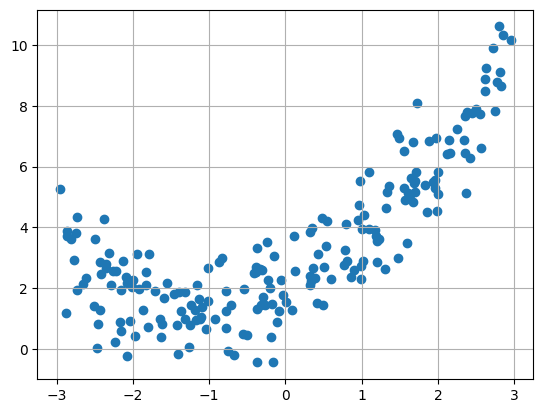

In [64]:
rng = np.random.default_rng(seed=42)
m = 200
X = 6 * rng.random((m,1)) - 3
y = 0.5 * X ** 2 + X + 2 + rng.standard_normal((m, 1))
plt.scatter(X,y)
plt.grid()
plt.show()

In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature.fit_transform(X,y)
# X_poly # Actual point and sqaure of it

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00540719]), array([[1.11022126, 0.50526985]]))

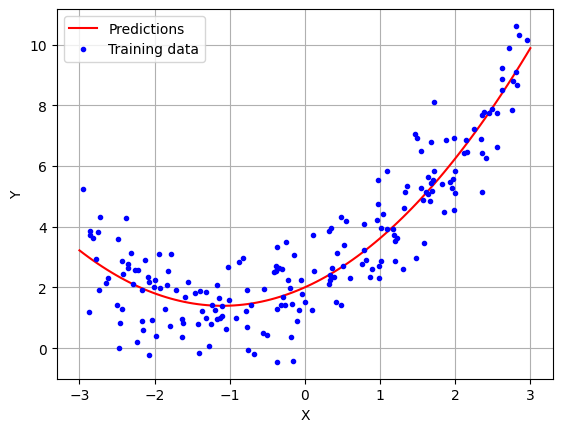

In [87]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feature.transform(X_new)
y_predict = lin_reg.predict(X_new_poly)

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.", label="Training data")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()